In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,f1_score,roc_curve,auc, precision_score
import lightgbm

In [67]:
df = pd.read_csv("G:\Data Science\Kaggle Competitions dataset\Amazon ML Hiring Hackerearth/train.csv")
df.head()
# features = pd.read_csv('G:\Data Science\Kaggle Competitions dataset\Amazon ML Hiring Hackerearth/feature_engineered.csv')
# extra_features = pd.read_csv('G:\Data Science\Kaggle Competitions dataset\Amazon ML Hiring Hackerearth/extra_features.csv')

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


In [68]:
df_test = pd.read_csv("G:\Data Science\Kaggle Competitions dataset\Amazon ML Hiring Hackerearth/test.csv")
df_test.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


In [69]:
df.customer_category.value_counts()

0    9443
1    1295
Name: customer_category, dtype: int64

In [70]:
def kde_target(var_name,target_name, df):
    
    corr = df[target_name].corr(df[var_name])

    plt.figure(figsize = (12, 6))
    
    sns.kdeplot(df.ix[df[target_name] == 0, var_name], label = f'{target_name} == 0')
    sns.kdeplot(df.ix[df[target_name] == 1, var_name], label = f'{target_name} == 1')
    
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title(f'%s Distribution {var_name}')
    plt.legend();
    
    print(f"The of {var_name} with the target is correlation is ")
    print(corr)
def kde_train_test(var_name,test_df,train_df):
    plt.figure(figsize = (12, 6))
    sns.kdeplot(train_df[var_name], label = f'{var_name}_TRAIN')
    sns.kdeplot(test_df[var_name], label = f'{var_name}_TEST')
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title(f'%s Distribution {var_name}')
    plt.legend();
    

In [71]:
df.columns

Index(['customer_id', 'customer_visit_score', 'customer_product_search_score',
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score', 'customer_active_segment', 'X1',
       'customer_category'],
      dtype='object')

In [72]:
num_cols = ["customer_visit_score","customer_product_search_score",'customer_product_search_score',
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score']

The of customer_visit_score with the target is correlation is 
-0.4496538003189927
The of customer_product_search_score with the target is correlation is 
-0.30086239336671977
The of customer_product_search_score with the target is correlation is 
-0.30086239336671977
The of customer_ctr_score with the target is correlation is 
0.7944448104707761
The of customer_stay_score with the target is correlation is 
0.679366132909949
The of customer_frequency_score with the target is correlation is 
0.3894653431912822
The of customer_product_variation_score with the target is correlation is 
0.49395754469261427
The of customer_order_score with the target is correlation is 
-0.38527849117103896
The of customer_affinity_score with the target is correlation is 
-0.27410464992366607


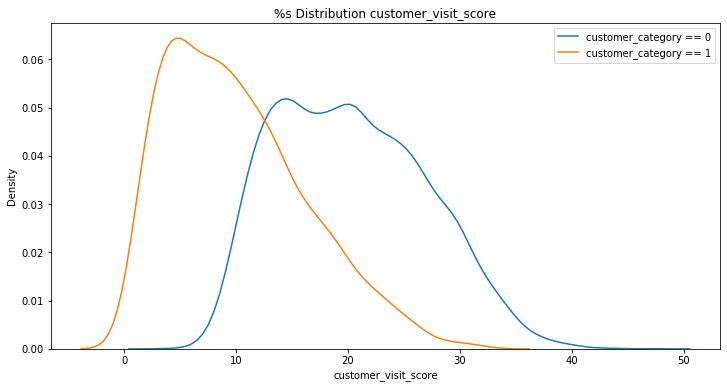

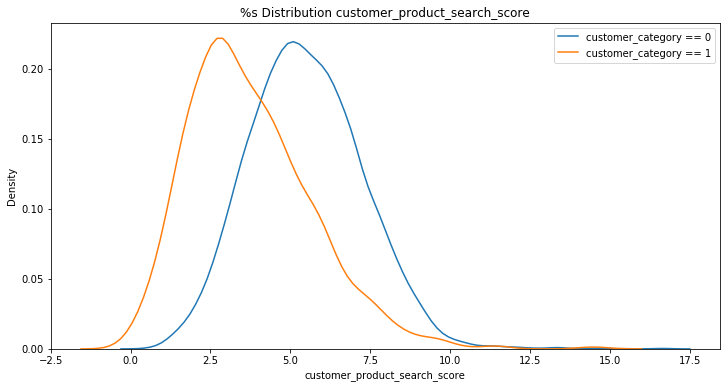

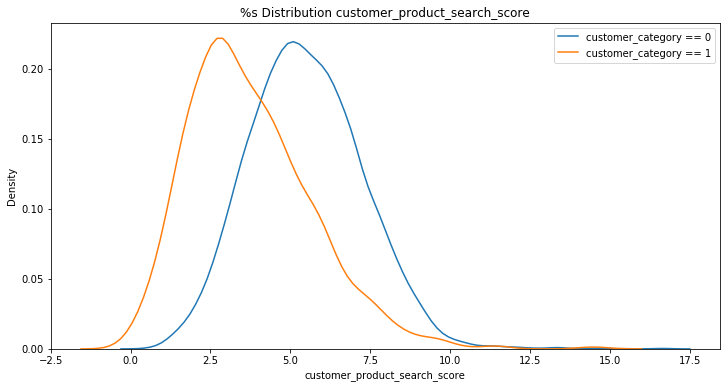

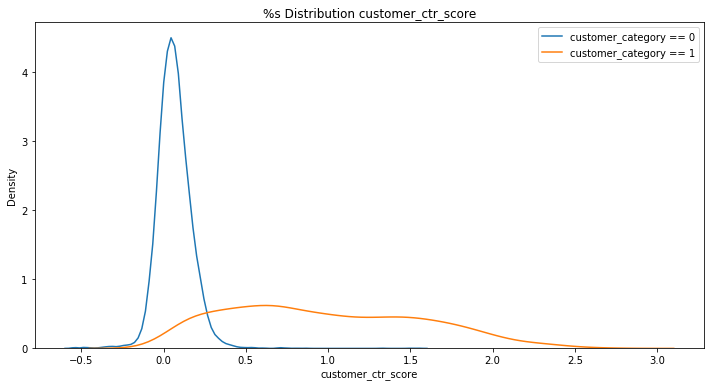

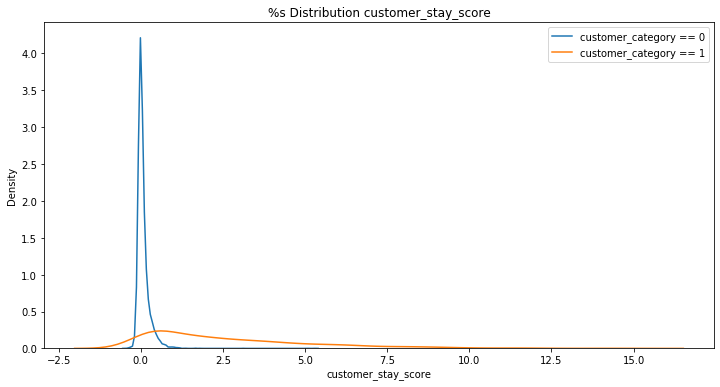

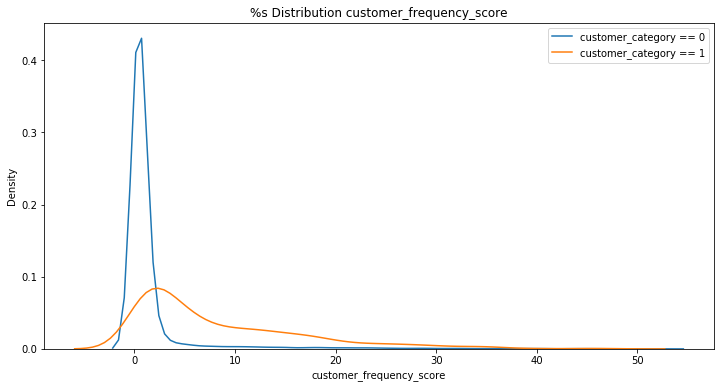

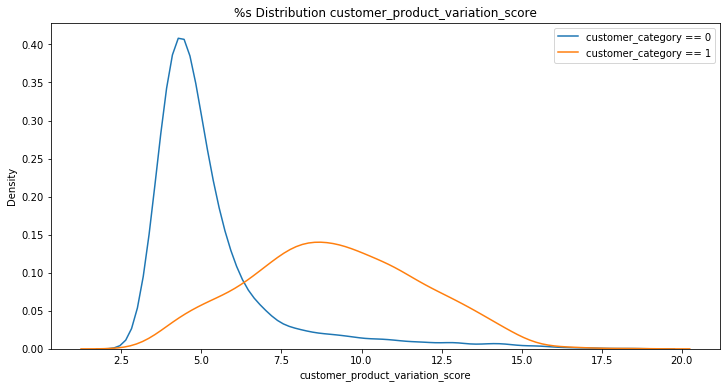

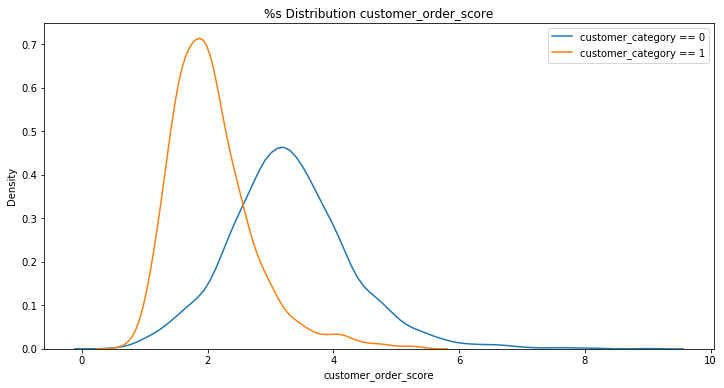

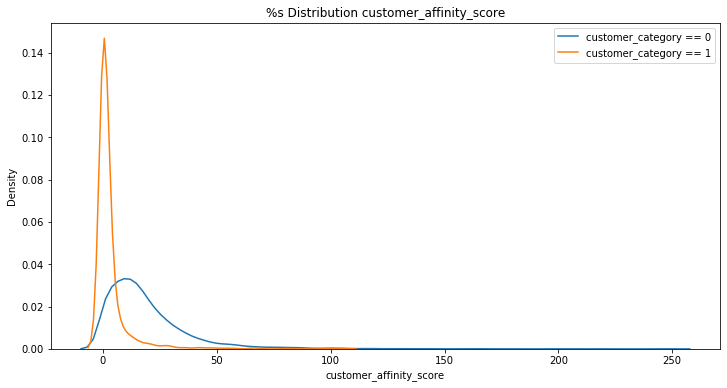

In [73]:
# GETTING THE KDE PLOT FOR TRAINING DATA FOR DIFFERENT TARGET VALUES
for col in num_cols:
    kde_target(col,'customer_category',df)

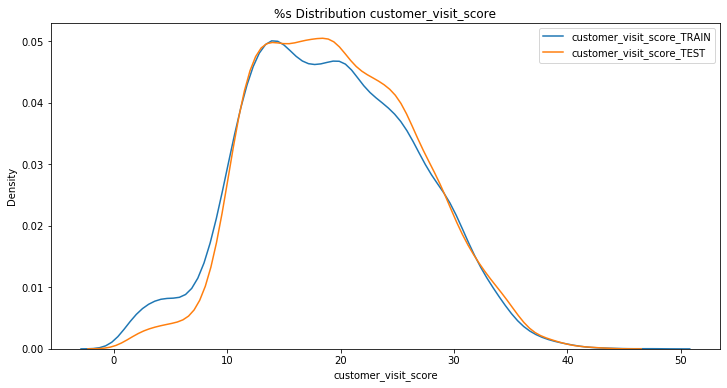

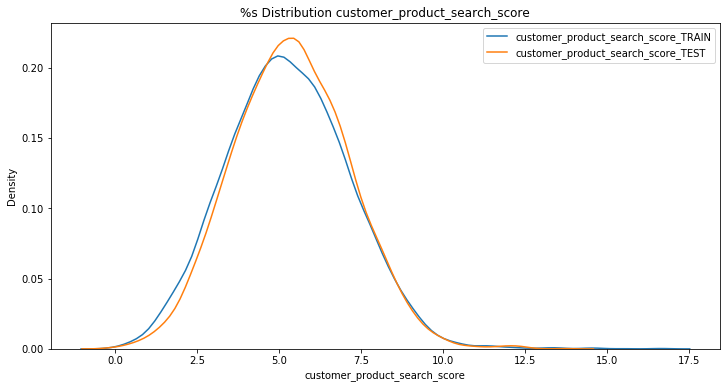

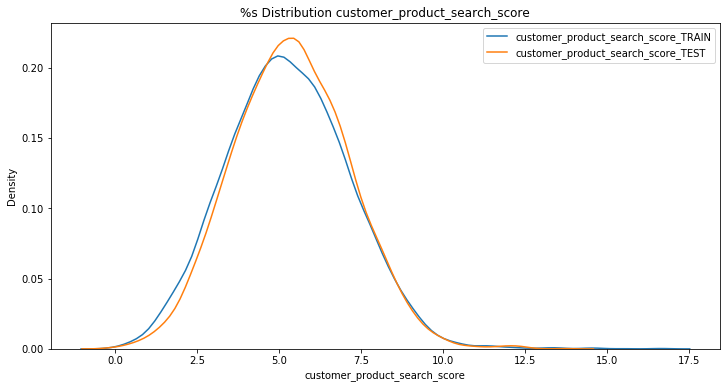

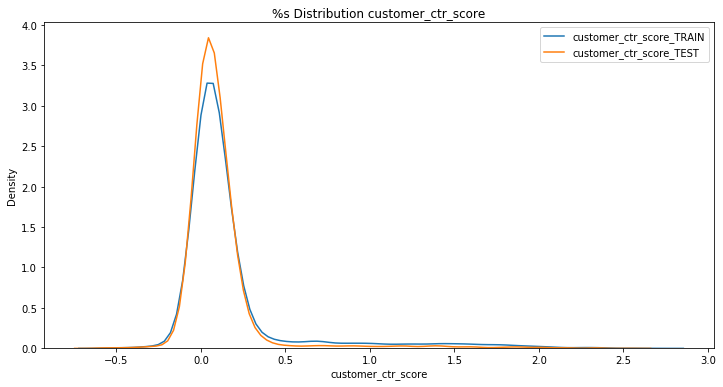

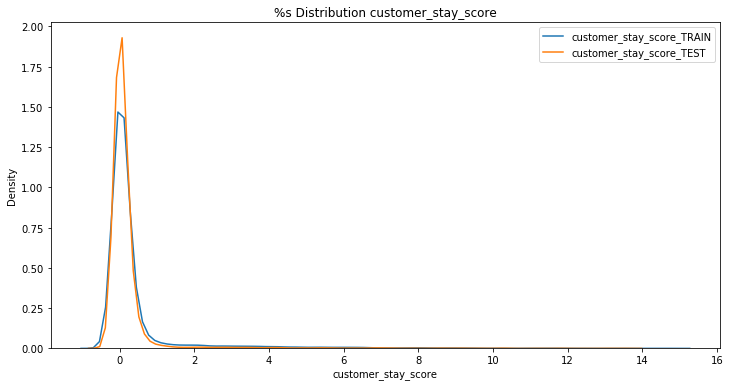

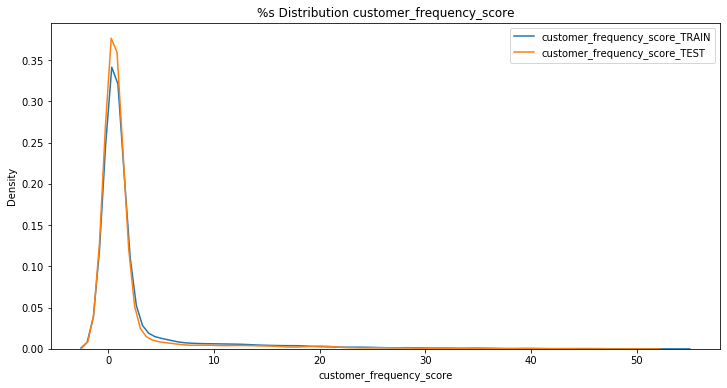

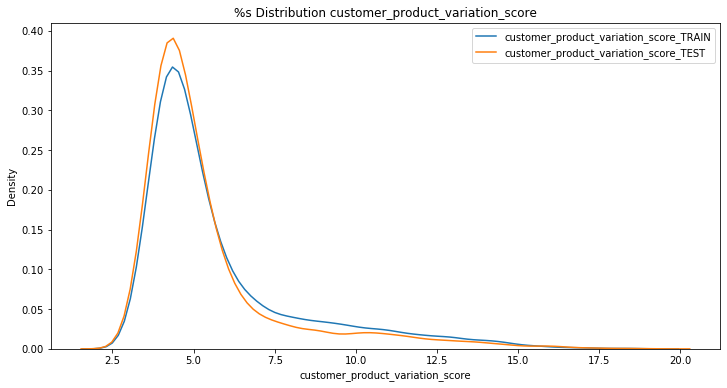

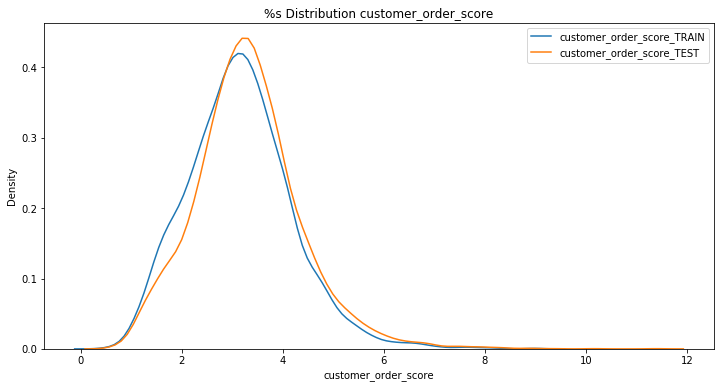

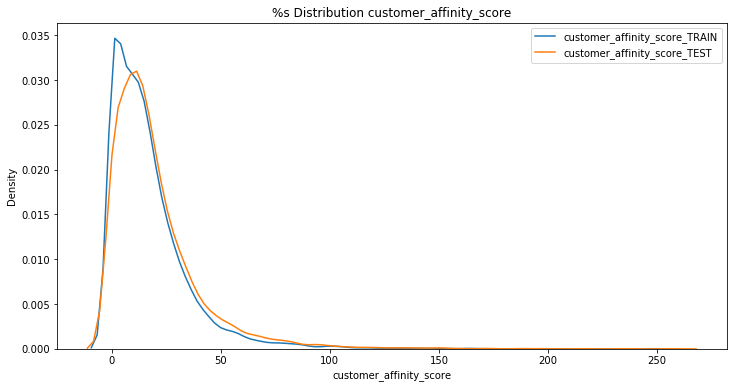

In [74]:
# GETTING THE KDE PLOT TO SEE THE DIFFERENCE IN TRAIN AND TEST DISTRIBUTION
for col in num_cols:
    kde_train_test(col,df_test,df)

In [75]:
y = df['customer_category']
df = df.drop('customer_category',axis = 1)

In [76]:
df = df.drop('customer_id',axis = 1)
df.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F
1,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A
2,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA
3,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F
4,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA


In [77]:
df.isna().sum()

customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment             23
X1                                  37
dtype: int64

In [78]:
type(df['customer_product_variation_score'].mean())

numpy.float64

In [79]:
# FILLING TRAINING DATA
df.isna().sum()
df['customer_product_search_score'].fillna(df['customer_product_search_score'].mean(),inplace=True)
df['customer_stay_score'].fillna(df['customer_stay_score'].mean(),inplace=True)
df['customer_product_variation_score'].fillna(df['customer_product_variation_score'].mean(),inplace=True)
df['customer_active_segment'].fillna(str(df['customer_active_segment'].mode()),inplace=True)
df['customer_order_score'].fillna(df['customer_order_score'].mean(),inplace=True)
df['X1'].fillna(str(df['X1'].mode()),inplace=True)


# FILLING TESTING DATA
df_test['customer_product_search_score'].fillna(df['customer_product_search_score'].mean(),inplace=True)
df_test['customer_stay_score'].fillna(df['customer_stay_score'].mean(),inplace=True)
df_test['customer_product_variation_score'].fillna(df['customer_product_variation_score'].mean(),inplace=True)
df_test['customer_active_segment'].fillna(str(df['customer_active_segment'].mode()),inplace=True)
df_test['customer_order_score'].fillna(df['customer_order_score'].mean(),inplace=True)
df_test['X1'].fillna(str(df['X1'].mode()),inplace=True)

In [80]:
df.isna().sum()

customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
dtype: int64

In [81]:
df_test.isna().sum()

customer_id                         0
customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
dtype: int64

In [82]:
df.to_csv("G:\Data Science\Kaggle Competitions dataset\Amazon ML Hiring Hackerearth/non_null_df_train.csv",index = False)
df_test.to_csv("G:\Data Science\Kaggle Competitions dataset\Amazon ML Hiring Hackerearth/non_null_df_test.csv",index = False)

In [83]:
# combining all the dataframes
#combined_feat = pd.concat([df,features],axis = 1)

In [104]:
df.shape

(10738, 10)

In [98]:
# combining train and test for dummification
ID = df_test['customer_id']
df_test = df_test.drop('customer_id',axis =1)
combined = pd.concat([df,df_test],axis = 0)


In [102]:
dum_df

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment_0 C\ndtype: object,customer_active_segment_A,customer_active_segment_AA,customer_active_segment_B,customer_active_segment_C,customer_active_segment_D,X1_0 BA\ndtype: object,X1_A,X1_AA,X1_BA,X1_E,X1_F
0,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,0,0,0,0,1,0,0,0,0,0,0,1
1,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,0,0,0,0,1,0,0,1,0,0,0,0
2,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,0,0,0,0,1,0,0,0,0,1,0,0
3,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,0,0,1,0,0,0,0,0,0,0,0,1
4,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,18.164300,7.240835,-0.056238,-0.177289,0.336608,4.043067,4.758199,68.052717,0,0,0,0,1,0,0,0,1,0,0,0
7156,25.363705,4.881059,0.038720,0.054397,2.452571,7.582251,1.823892,2.080245,0,0,0,0,1,0,0,0,0,1,0,0
7157,11.160720,5.019859,0.053864,-0.102337,4.968183,8.585355,2.422193,0.616082,0,0,0,0,1,0,0,0,0,1,0,0
7158,17.140020,9.269037,0.059911,-0.004299,0.357399,4.193971,3.715392,26.939493,0,0,0,0,1,0,0,0,0,1,0,0


In [108]:
dum_df = pd.get_dummies(combined)
df = dum_df.iloc[:10738,:]
df_test  = dum_df.iloc[10738:,:]


In [109]:
dum_df.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment_0 C\ndtype: object,customer_active_segment_A,customer_active_segment_AA,customer_active_segment_B,customer_active_segment_C,customer_active_segment_D,X1_0 BA\ndtype: object,X1_A,X1_AA,X1_BA,X1_E,X1_F
0,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,0,0,0,0,1,0,0,0,0,0,0,1
1,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,0,0,0,0,1,0,0,1,0,0,0,0
2,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,0,0,0,0,1,0,0,0,0,1,0,0
3,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,0,0,1,0,0,0,0,0,0,0,0,1
4,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,0,0,0,0,1,0,0,0,1,0,0,0


In [110]:
rf = RandomForestClassifier(n_estimators = 5000)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2361
           1       0.97      0.81      0.89       324

    accuracy                           0.97      2685
   macro avg       0.97      0.90      0.94      2685
weighted avg       0.97      0.97      0.97      2685

0.8855218855218856
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2361
           1       0.96      0.81      0.88       324

    accuracy                           0.97      2685
   macro avg       0.97      0.90      0.93      2685
weighted avg       0.97      0.97      0.97      2685

0.8795986622073579
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2361
           1       0.97      0.78      0.87       324

    accuracy                           0.97      2685
   macro avg       0.97      0.89      0.92      2685
weighted avg       0.97      0.97   

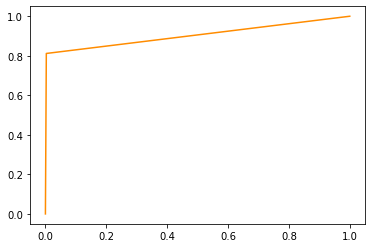

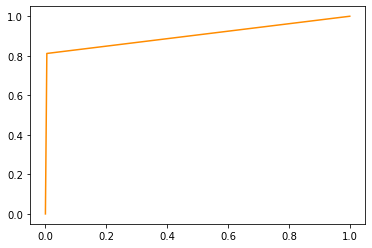

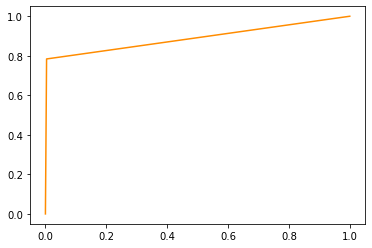

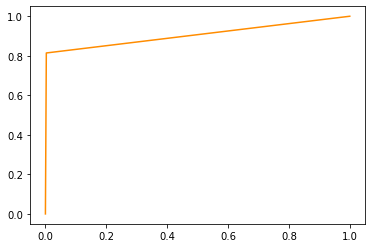

In [91]:
avg_f1 = []
precision = []
strat = StratifiedKFold(n_splits=4, random_state=42, shuffle=True)
lgbm_para = {
    'objective' : 'binary',
    'learning_rate' : 0.0001,
    'n_jobs' : 12,
    'metric' : 'binary_logloss',
    'num_iterations' : 10000
}
for train,test in strat.split(dum_df,y):
    X_train, X_test = df.values[train], df.values[test]
    y_train, y_test = y.values[train], y.values[test]
    # lr = LogisticRegression(n_jobs = -1)
    # lr.fit(X_train,y_train)
    # lr_pred = lr.predict(X_test)
    # dt = DecisionTreeClassifier()
    # dt.fit(X_train,y_train)
    # dt_pred = dt.predict(X_test)
    # rf = RandomForestClassifier(n_estimators= 500,n_jobs = -1)
    # rf.fit(X_train,y_train)
    # rf_predict = rf.predict(X_test)
    gbm = lightgbm
    train_d = gbm.Dataset(X_train,label = y_train)
    lgbm = gbm.train(lgbm_para,train_set=train_d)
    lgbm_pred = lgbm.predict(X_test)
    for c,i in enumerate(lgbm_pred):
        if i>0.5:
            lgbm_pred[c] = 1
        else:
            lgbm_pred[c] = 0

    print(classification_report(y_test,lgbm_pred))
    print(f1_score(y_test,lgbm_pred))
    avg_f1.append(f1_score(y_test,lgbm_pred))
    precision.append(precision_score(y_test,lgbm_pred,average = 'macro'))
    
    fpr = []
    tpr = []
    roc_auc = []
    
    fpr, tpr, _ = roc_curve(y_test, lgbm_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
print("AVERAGE F1 SCORE IS ")
print(sum(avg_f1)/4)
print("AVERAGE PRECISION SCORE IS ")
print(sum(precision)/4)

In [ ]:
lgbm_para = {
    'objective' : 'binary',
    'learning_rate' : 0.0001,
    'n_jobs' : 12,
    'metric' : 'binary_logloss',
    'num_iterations' : 10000
}

In [115]:
gbm = lightgbm
train_d = gbm.Dataset(df.values,label = y)
lgbm = gbm.train(lgbm_para,train_set=train_d)
lgbm_pred = lgbm.predict(df_test)

In [113]:
for c,i in enumerate(lgbm_pred):
    if i>0.5:
        lgbm_pred[c] = 1
    else:
        lgbm_pred[c] = 0

10738

In [114]:
df.shape

(10738, 20)